In [1]:
#Importing Packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
pd.get_option('display.max_rows')

60

In [3]:
#Importing data from csv

df1=pd.read_csv('Thresy_variables.csv',index_col=None)
print(df1)

      country_code       v1_family          v1_friends        v1_leisure  \
0               AD  Very important      Very important    Very important   
1               AD  Very important      Very important    Very important   
2               AD  Very important    Rather important  Rather important   
3               AD  Very important      Very important    Very important   
4               AD  Very important      Very important    Very important   
...            ...             ...                 ...               ...   
72574           ZW  Very important  Not very important    Very important   
72575           ZW  Very important      Very important  Rather important   
72576           ZW  Very important  Not very important  Rather important   
72577           ZW  Very important    Rather important  Rather important   
72578           ZW  Very important    Rather important  Rather important   

                v1_politics             v1_work           v1_religion     sex  \
0     

In [4]:
#Displaying the top 5 rows of df1

df1.head()

,country_code,v1_family,v1_friends,v1_leisure,v1_politics,v1_work,v1_religion,sex,marital_status,education,income_levels,response_id
0,AD,Very important,Very important,Very important,Not very important,Very important,Not at all important,Female,Married,Middle,Medium,1
1,AD,Very important,Very important,Very important,Not at all important,Very important,Not at all important,Male,Living together as married,Upper,High,2
2,AD,Very important,Rather important,Rather important,Rather important,Not very important,Not very important,Male,Separated,Upper,Medium,3
3,AD,Very important,Very important,Very important,Not at all important,Rather important,Not at all important,Female,Living together as married,Lower,Medium,4
4,AD,Very important,Very important,Very important,Not very important,Very important,Not very important,Male,Living together as married,Lower,Medium,5


In [5]:
#Frequency of the variable: v1_family of data frame df1

family_count = print(pd.crosstab(index=df1['v1_family'], columns='count'))

col_0                 count
v1_family                  
Not at all important    137
Not very important      572
Rather important       6171
Very important        65699


In [6]:
#Importing data through Web Scrapping

import requests

In [7]:
wiki_url = "https://en.wikipedia.org/wiki/ISO_3166-2"

In [8]:
table_class="wikitable sortable jquery-tablesorter"

In [9]:
response=requests.get(wiki_url)

In [10]:
print(response.status_code)

200


In [11]:
soup = BeautifulSoup(response.text, 'html.parser')

In [12]:
mytable=soup.find('table',{'class':"wikitable"})

In [13]:
df2=pd.read_html(str(mytable))

In [14]:
df2=pd.DataFrame(df2[0])
print(df2)

    Entry (click to view codes) Country name (using title case)  \
0                            AD                         Andorra   
1                            AE            United Arab Emirates   
2                            AF                     Afghanistan   
3                            AG             Antigua and Barbuda   
4                            AI                        Anguilla   
..                          ...                             ...   
244                          YE                           Yemen   
245                          YT                         Mayotte   
246                          ZA                    South Africa   
247                          ZM                          Zambia   
248                          ZW                        Zimbabwe   

     Subdivisions assigned codes[1]  
0                        7 parishes  
1                        7 emirates  
2                      34 provinces  
3         6 parishes 2 dependencies  
4    

In [15]:
print(df2.head())

  Entry (click to view codes) Country name (using title case)  \
0                          AD                         Andorra   
1                          AE            United Arab Emirates   
2                          AF                     Afghanistan   
3                          AG             Antigua and Barbuda   
4                          AI                        Anguilla   

  Subdivisions assigned codes[1]  
0                     7 parishes  
1                     7 emirates  
2                   34 provinces  
3      6 parishes 2 dependencies  
4                              —  


In [16]:
print(df2.columns)

Index(['Entry (click to view codes)', 'Country name (using title case)',
       'Subdivisions assigned codes[1]'],
      dtype='object')


In [17]:
#Renaming the columns of dataframe

df2.rename(columns= {'Entry (click to view codes)': 'country_code', 'Country name (using title case)': 'country_name'}, inplace=True)

In [18]:
#Removing unnecessary column

df2 = df2.drop("Subdivisions assigned codes[1]", axis=1)

In [19]:
print(df2)

    country_code          country_name
0             AD               Andorra
1             AE  United Arab Emirates
2             AF           Afghanistan
3             AG   Antigua and Barbuda
4             AI              Anguilla
..           ...                   ...
244           YE                 Yemen
245           YT               Mayotte
246           ZA          South Africa
247           ZM                Zambia
248           ZW              Zimbabwe

[249 rows x 2 columns]


In [20]:
#Importing dataset of GDP

df_gdp=pd.read_csv('Thresy_GDP.csv',index_col=None)
print(df_gdp)

               GDP country_code
0      3202.188607           AW
1     19807.067268           AF
2     62306.913444           AO
3     14799.615097           AL
4      3155.065488           AD
..             ...          ...
200     807.027244           WS
201   23486.269599           YE
202  301923.639270           ZA
203   19320.053859           ZM
204   16768.513443           ZW

[205 rows x 2 columns]


In [21]:
#Merging the data frames

df_new = df1.merge(df2, on='country_code' )

In [22]:
print(df_new)

      country_code       v1_family          v1_friends        v1_leisure  \
0               AD  Very important      Very important    Very important   
1               AD  Very important      Very important    Very important   
2               AD  Very important    Rather important  Rather important   
3               AD  Very important      Very important    Very important   
4               AD  Very important      Very important    Very important   
...            ...             ...                 ...               ...   
72574           ZW  Very important  Not very important    Very important   
72575           ZW  Very important      Very important  Rather important   
72576           ZW  Very important  Not very important  Rather important   
72577           ZW  Very important    Rather important  Rather important   
72578           ZW  Very important    Rather important  Rather important   

                v1_politics             v1_work           v1_religion     sex  \
0     

In [23]:
df = df_new.merge(df_gdp, on='country_code' )
print(df)

      country_code       v1_family          v1_friends        v1_leisure  \
0               AD  Very important      Very important    Very important   
1               AD  Very important      Very important    Very important   
2               AD  Very important    Rather important  Rather important   
3               AD  Very important      Very important    Very important   
4               AD  Very important      Very important    Very important   
...            ...             ...                 ...               ...   
71353           ZW  Very important  Not very important    Very important   
71354           ZW  Very important      Very important  Rather important   
71355           ZW  Very important  Not very important  Rather important   
71356           ZW  Very important    Rather important  Rather important   
71357           ZW  Very important    Rather important  Rather important   

                v1_politics             v1_work           v1_religion     sex  \
0     

In [24]:
#Checking for duplicates

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
71353    False
71354    False
71355    False
71356    False
71357    False
Length: 71358, dtype: bool

In [25]:
df.duplicated().sum()

0

In [26]:
#Remove duplicates

df.drop_duplicates()

,country_code,v1_family,v1_friends,v1_leisure,v1_politics,v1_work,v1_religion,sex,marital_status,education,income_levels,response_id,country_name,GDP
0,AD,Very important,Very important,Very important,Not very important,Very important,Not at all important,Female,Married,Middle,Medium,1,Andorra,3155.065488
1,AD,Very important,Very important,Very important,Not at all important,Very important,Not at all important,Male,Living together as married,Upper,High,2,Andorra,3155.065488
2,AD,Very important,Rather important,Rather important,Rather important,Not very important,Not very important,Male,Separated,Upper,Medium,3,Andorra,3155.065488
3,AD,Very important,Very important,Very important,Not at all important,Rather important,Not at all important,Female,Living together as married,Lower,Medium,4,Andorra,3155.065488
4,AD,Very important,Very important,Very important,Not very important,Very important,Not very important,Male,Living together as married,Lower,Medium,5,Andorra,3155.065488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71353,ZW,Very important,Not very important,Very important,Very important,Very important,Rather important,Female,Married,Lower,Medium,72575,Zimbabwe,16768.513443
71354,ZW,Very important,Very important,Rather important,Very important,Very important,Very important,Male,Married,Upper,Medium,72576,Zimbabwe,16768.513443
71355,ZW,Very important,Not very important,Rather important,Rather important,Rather important,Rather important,Female,Married,Lower,Medium,72577,Zimbabwe,16768.513443
71356,ZW,Very important,Rather important,Rather important,Very important,Very important,Very important,Female,Married,Lower,Low,72578,Zimbabwe,16768.513443


In [27]:
# Detecting and Replacing Missing values

df.isna()

,country_code,v1_family,v1_friends,v1_leisure,v1_politics,v1_work,v1_religion,sex,marital_status,education,income_levels,response_id,country_name,GDP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71353,False,False,False,False,False,False,False,False,False,False,False,False,False,False
71354,False,False,False,False,False,False,False,False,False,False,False,False,False,False
71355,False,False,False,False,False,False,False,False,False,False,False,False,False,False
71356,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df.isna().any()

country_code      False
v1_family         False
v1_friends        False
v1_leisure        False
v1_politics       False
v1_work           False
v1_religion       False
sex               False
marital_status    False
education         False
income_levels     False
response_id       False
country_name      False
GDP               False
dtype: bool

In [29]:
df.fillna

<bound method DataFrame.fillna of       country_code       v1_family          v1_friends        v1_leisure  \
0               AD  Very important      Very important    Very important   
1               AD  Very important      Very important    Very important   
2               AD  Very important    Rather important  Rather important   
3               AD  Very important      Very important    Very important   
4               AD  Very important      Very important    Very important   
...            ...             ...                 ...               ...   
71353           ZW  Very important  Not very important    Very important   
71354           ZW  Very important      Very important  Rather important   
71355           ZW  Very important  Not very important  Rather important   
71356           ZW  Very important    Rather important  Rather important   
71357           ZW  Very important    Rather important  Rather important   

                v1_politics             v1_work      

In [30]:
#Subsetting Zimbabwe and Germany

df_zw = df[df["country_code"]=="ZW"]
df_de = df[df["country_code"]=="DE"]

In [31]:
print(df_zw)

      country_code       v1_family            v1_friends          v1_leisure  \
70164           ZW  Very important    Not very important  Not very important   
70165           ZW  Very important  Not at all important      Very important   
70166           ZW  Very important    Not very important      Very important   
70167           ZW  Very important      Rather important    Rather important   
70168           ZW  Very important      Rather important      Very important   
...            ...             ...                   ...                 ...   
71353           ZW  Very important    Not very important      Very important   
71354           ZW  Very important        Very important    Rather important   
71355           ZW  Very important    Not very important    Rather important   
71356           ZW  Very important      Rather important    Rather important   
71357           ZW  Very important      Rather important    Rather important   

                v1_politics           v

In [32]:
# Indexing both the required data of Zimbabwe and Germany together

df_index= df.set_index('country_name')
df_index.loc[["Zimbabwe","Germany"]]
df_main= df_index.loc[["Zimbabwe","Germany"]]

In [33]:
# Sorting the data

df_main.sort_values("country_name", ascending=True)

,country_code,v1_family,v1_friends,v1_leisure,v1_politics,v1_work,v1_religion,sex,marital_status,education,income_levels,response_id,GDP
country_name,,,,,,,,,,,,,
Germany,DE,Very important,Very important,Very important,Rather important,Very important,Not very important,Female,Single/Never married,Middle,Low,21837,3.806060e+06
Germany,DE,Very important,Rather important,Rather important,Rather important,Not at all important,Rather important,Female,Married,Middle,Medium,22269,3.806060e+06
Germany,DE,Very important,Very important,Rather important,Rather important,Rather important,Rather important,Female,Married,Middle,Medium,22270,3.806060e+06
Germany,DE,Rather important,Rather important,Rather important,Not very important,Rather important,Rather important,Male,Married,Middle,Medium,22271,3.806060e+06
Germany,DE,Very important,Rather important,Very important,Not very important,Rather important,Not at all important,Male,Married,Middle,Medium,22272,3.806060e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZW,Very important,Very important,Rather important,Very important,Very important,Very important,Female,Separated,Middle,Low,72184,1.676851e+04
Zimbabwe,ZW,Very important,Very important,Very important,Very important,Very important,Very important,Female,Single/Never married,Middle,Medium,72185,1.676851e+04
Zimbabwe,ZW,Very important,Rather important,Very important,Rather important,Very important,Very important,Female,Widowed,Lower,Medium,72186,1.676851e+04


In [34]:
#Insight 1
#Germany GDP > Zimbabwe GDP
# Germany is more developed than Zimbabwe
#To check if work is more imp to respondents of Germany over Zimbabwe

In [35]:
# Work value count and converting it into percentage (Germany)

print(df_de.v1_work.value_counts())

Very important          608
Rather important        597
Not very important      117
Not at all important    100
Name: v1_work, dtype: int64


In [36]:
#Converting the count to percentage

print(df_de.v1_work.value_counts(normalize=True)*100)

Very important          42.756681
Rather important        41.983122
Not very important       8.227848
Not at all important     7.032349
Name: v1_work, dtype: float64


In [37]:
# Work value count and converting it into percentage (Zimbabwe)

print(df_zw.v1_work.value_counts())

Very important          1054
Rather important         126
Not very important        11
Not at all important       3
Name: v1_work, dtype: int64


In [38]:
#Converting the count to percentage

print(df_zw.v1_work.value_counts(normalize=True)*100)

Very important          88.274707
Rather important        10.552764
Not very important       0.921273
Not at all important     0.251256
Name: v1_work, dtype: float64


In [39]:
# Percentage on work value of Germany & Zimbabwe

print(df_index.v1_work.value_counts(normalize=True)*100)

Very important          59.260349
Rather important        30.147986
Not very important       7.156871
Not at all important     3.434794
Name: v1_work, dtype: float64


In [40]:
# Results: 1. 42.8% of the respondents from Germany said work is very imp
# 2. 88.3% of the respondents from Zimbabwe said work is very imp
# 3. 59.3% of the respondents from both Zimbabwe and Germany said work is very imp
# 4. Germany is a developed country with high GDP, but percentage of respondents who said work is imp is < Zimbabwe

In [41]:
# Insight 2
# For the variables: Family, friends, work, leisure, politics & religion
# Most imp variable to respondents of Germany (developed country) & Zimbabwe (developing country)

In [42]:
# Germany

In [43]:
print(df_de.v1_family.value_counts(normalize=True)*100)

Very important          88.326301
Rather important        10.337553
Not very important       1.195499
Not at all important     0.140647
Name: v1_family, dtype: float64


In [44]:
print(df_de.v1_friends.value_counts(normalize=True)*100)

Very important          59.845288
Rather important        37.201125
Not very important       2.812940
Not at all important     0.140647
Name: v1_friends, dtype: float64


In [45]:
print(df_de.v1_work.value_counts(normalize=True)*100)

Very important          42.756681
Rather important        41.983122
Not very important       8.227848
Not at all important     7.032349
Name: v1_work, dtype: float64


In [46]:
print(df_de.v1_leisure.value_counts(normalize=True)*100)

Rather important        54.078762
Very important          38.115331
Not very important       7.454290
Not at all important     0.351617
Name: v1_leisure, dtype: float64


In [47]:
print(df_de.v1_religion.value_counts(normalize=True)*100)

Not very important      35.724332
Not at all important    26.090014
Rather important        24.331927
Very important          13.853727
Name: v1_religion, dtype: float64


In [48]:
print(df_de.v1_politics.value_counts(normalize=True)*100)

Rather important        54.641350
Not very important      25.035162
Very important          15.611814
Not at all important     4.711674
Name: v1_politics, dtype: float64


In [49]:
very_important_de = [88.33, 59.85, 42.76, 54.08, 35.72, 54.64]

In [50]:
variables =["Family", "Friends", "Work", "Leisure", "Religion", "Politics"]

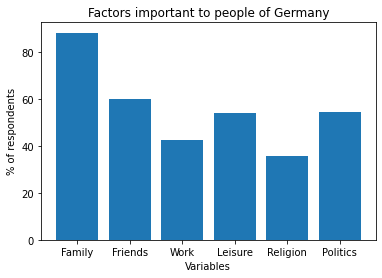

In [51]:
plt.bar(variables, very_important_de )
plt.xlabel('Variables')
plt.ylabel('% of respondents')
plt.title('Factors important to people of Germany')
plt.show()

In [52]:
# Zimbabwe

In [53]:
print(df_zw.v1_family.value_counts(normalize=True)*100)

Very important        96.314908
Rather important       3.517588
Not very important     0.167504
Name: v1_family, dtype: float64


In [54]:
print(df_zw.v1_friends.value_counts(normalize=True)*100)

Rather important        47.989950
Very important          30.150754
Not very important      18.090452
Not at all important     3.768844
Name: v1_friends, dtype: float64


In [55]:
print(df_zw.v1_work.value_counts(normalize=True)*100)

Very important          88.274707
Rather important        10.552764
Not very important       0.921273
Not at all important     0.251256
Name: v1_work, dtype: float64


In [56]:
print(df_zw.v1_leisure.value_counts(normalize=True)*100)

Rather important        41.457286
Very important          39.195980
Not very important      15.996650
Not at all important     3.350084
Name: v1_leisure, dtype: float64


In [57]:
print(df_zw.v1_religion.value_counts(normalize=True)*100)

Very important          87.855946
Rather important        10.636516
Not very important       1.172529
Not at all important     0.335008
Name: v1_religion, dtype: float64


In [58]:
print(df_zw.v1_politics.value_counts(normalize=True)*100)

Rather important        34.422111
Very important          24.623116
Not very important      22.445561
Not at all important    18.509213
Name: v1_politics, dtype: float64


In [59]:
very_imp_zw = [96.31, 47.99, 88.27, 41.46, 87.86, 34.42]

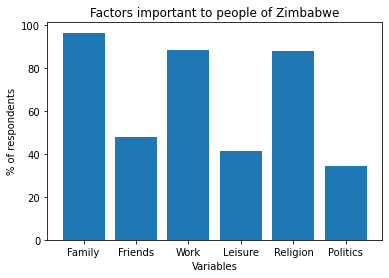

In [60]:
plt.bar(variables, very_imp_zw )
plt.xlabel('Variables')
plt.ylabel('% of respondents')
plt.title('Factors important to people of Zimbabwe')
plt.show()

In [61]:
# Results: 1. For Germany, family is most important followed by friends and leisure
# 2. Germany : We can note that, since politics is very imp, religion is not imp. These variables can have relation
# 3. Zimbabwe: Family is the most imp followed by work and religion 
# 4. Zimbabwe: One reason why religion is very imp could be that family is also imp

In [62]:
# Creating an indicator for both Zimbabwe and Germany as the variables are discrete

df['ZW_indicator'] = 0

In [63]:
df.loc[df['country_code'] == "ZW", 'ZW_indicator'] = 1

In [64]:
df['DE_indicator'] = 0

In [65]:
df.loc[df['country_code'] == "DE", 'DE_indicator'] = 1

In [66]:
print(df.ZW_indicator)

0        0
1        0
2        0
3        0
4        0
        ..
71353    1
71354    1
71355    1
71356    1
71357    1
Name: ZW_indicator, Length: 71358, dtype: int64


In [67]:
print(df.DE_indicator)

0        0
1        0
2        0
3        0
4        0
        ..
71353    0
71354    0
71355    0
71356    0
71357    0
Name: DE_indicator, Length: 71358, dtype: int64


In [68]:
df.dtypes

country_code       object
v1_family          object
v1_friends         object
v1_leisure         object
v1_politics        object
v1_work            object
v1_religion        object
sex                object
marital_status     object
education          object
income_levels      object
response_id         int64
country_name       object
GDP               float64
ZW_indicator        int64
DE_indicator        int64
dtype: object

In [69]:
# Assigning values from below dictionary to the variable data as the current values are discrete

cleanup_nums_fam = {"v1_family":     {"Very important": 1, "Rather important": 2, "Not very important": 3, "Not at all important": 4, }}

In [70]:
cleanup_nums_friends = {"v1_friends":     {"Very important": 1, "Rather important": 2, "Not very important": 3, "Not at all important": 4, }}

In [71]:
cleanup_nums_leisure = {"v1_leisure":     {"Very important": 1, "Rather important": 2, "Not very important": 3, "Not at all important": 4, }}

In [72]:
cleanup_nums_work = {"v1_work":     {"Very important": 1, "Rather important": 2, "Not very important": 3, "Not at all important": 4, }}

In [73]:
cleanup_nums_politics = {"v1_politics":     {"Very important": 1, "Rather important": 2, "Not very important": 3, "Not at all important": 4, }}

In [74]:
cleanup_nums_religion = {"v1_religion":     {"Very important": 1, "Rather important": 2, "Not very important": 3, "Not at all important": 4, }}

In [75]:
df = df.replace(cleanup_nums_fam)

In [76]:
df = df.replace(cleanup_nums_friends)

In [77]:
df = df.replace(cleanup_nums_leisure)

In [78]:
df = df.replace(cleanup_nums_work)

In [79]:
df = df.replace(cleanup_nums_politics)

In [80]:
df = df.replace(cleanup_nums_religion)

In [81]:
# Work Value Percentage of data frame df

print(df_index.v1_family.value_counts(normalize=True)*100)

Very important          90.519633
Rather important         8.503602
Not very important       0.784775
Not at all important     0.191990
Name: v1_family, dtype: float64


In [82]:
# Total of 90.5% respondents consider work very imp

In [83]:
# Insight 3
# Analyse, respondents who said both family & friends are imp. Is leisure imp to them

In [84]:
# Loop and Conditional statements
# The below coding is done o convert the data into continuous and this could be used to run regression model

In [85]:
df["v1_family_Very_Imp"]=[ 1 if i<2 else 0 for i in df.v1_family] 

In [86]:
df["v1_family_Rath_Imp"]=[ 1 if i<3 & i>1 else 0 for i in df.v1_family] 

In [87]:
df["v1_family_Not_Very_Imp"]=[ 1 if i<4 & i>2 else 0 for i in df.v1_family] 

In [88]:
df["v1_family_Not_at_all_Imp"]=[ 1 if i>3 else 0 for i in df.v1_family] 

In [89]:
df["v1_friends_Very_Imp"]=[ 1 if i<2 else 0 for i in df.v1_friends] 

In [90]:
df["v1_friends_Rath_Imp"]=[ 1 if i<3 & i>1 else 0 for i in df.v1_friends] 

In [91]:
df["v1_friends_Not_Very_Imp"]=[ 1 if i<4 & i>2 else 0 for i in df.v1_friends] 

In [92]:
df["v1_friends_Not_at_all_Imp"]=[ 1 if i>3 else 0 for i in df.v1_friends] 

In [93]:
df["v1_leisure_Very_Imp"]=[ 1 if i<2 else 0 for i in df.v1_leisure] 

In [94]:
df["v1_leisure_Rath_Imp"]=[ 1 if i<3 & i>1 else 0 for i in df.v1_leisure] 

In [95]:
df["v1_leisure_Not_Very_Imp"]=[ 1 if i<4 & i>2 else 0 for i in df.v1_leisure] 

In [96]:
df["v1_leisure_Not_at_all_Imp"]=[ 1 if i>3 else 0 for i in df.v1_leisure] 

In [97]:
df["v1_work_Very_Imp"]=[ 1 if i<2 else 0 for i in df.v1_work]

In [98]:
df["v1_work_Rath_Imp"]=[ 1 if i<3 & i>1 else 0 for i in df.v1_work] 

In [99]:
df["v1_work_Not_Very_Imp"]=[ 1 if i<4 & i>2 else 0 for i in df.v1_work] 

In [100]:
df["v1_work_Not_at_all_Imp"]=[ 1 if i>3 else 0 for i in df.v1_work]

In [101]:
df["v1_politics_Very_Imp"]=[ 1 if i<2 else 0 for i in df.v1_politics]

In [102]:
df["v1_politics_Rath_Imp"]=[ 1 if i<3 & i>1 else 0 for i in df.v1_politics]

In [103]:
df["v1_politics_Not_Very_Imp"]=[ 1 if i<4 & i>2 else 0 for i in df.v1_politics]

In [104]:
df["v1_politics_Not_at_all_Imp"]=[ 1 if i>3 else 0 for i in df.v1_politics]

In [105]:
df["v1_religion_Very_Imp"]=[ 1 if i<2 else 0 for i in df.v1_religion]

In [106]:
df["v1_religion_Rath_Imp"]=[ 1 if i<3 & i>1 else 0 for i in df.v1_religion]

In [107]:
df["v1_religion_Not_Very_Imp"]=[ 1 if i<4 & i>2 else 0 for i in df.v1_religion]

In [108]:
df["v1_religion_Not_at_all_Imp"]=[ 1 if i>3 else 0 for i in df.v1_religion]

In [109]:
#Conditional Statement for all three family, friends & Leisure is very imp

conditions = [
    (df['v1_family_Very_Imp'] > 0) & (df['v1_friends_Very_Imp'] > 0) & (df['v1_leisure_Very_Imp']> 0)
    ]

In [110]:
values=[1]

In [111]:
# numpy function

df['relation1'] = np.select(conditions, values)

In [112]:
df["relation1"].mean()

0.22829955996524567

In [113]:
#Conditional Statement for all three family, friends & Leisure is very imp and person is of Zimbabwe

conditions = [
    (df['v1_family_Very_Imp'] > 0) & (df['v1_friends_Very_Imp'] > 0) & (df['v1_leisure_Very_Imp']> 0) & (df['ZW_indicator'] >0)
    ]

In [114]:
values=[1]

In [115]:
df['relation2'] = np.select(conditions, values)

In [116]:
df["relation2"].mean()

0.002564533759354242

In [117]:
#Conditional Statement for all three family, friends & Leisure is very imp and person is of Germany

conditions = [
    (df['v1_family_Very_Imp'] > 0) & (df['v1_friends_Very_Imp'] > 0) & (df['v1_leisure_Very_Imp']> 0) & (df['DE_indicator'] >0)
    ]

In [118]:
values=[1]

In [119]:
df['relation3'] = np.select(conditions, values)

In [120]:
df["relation3"].mean()

0.005157095210067547

In [121]:
# Therefore, only 22.83% of respondents from all the countries said that if
# 1. Family and friends are imp, leisure is also imp
# 2. Whereas, only 0.26% of respondents from Zimbabwe said that all three are imp to them
# 3. Only 0.52% of respondents from Germany said that all three are imp to them
# 4. Germany being more developed they give importance to all of them above Zimbabwe (developing country)

In [122]:
# Insight 4: Relationship between Work and Gender
# Who gives more importance to work, men or women

In [123]:
print(df.sex)

0        Female
1          Male
2          Male
3        Female
4          Male
          ...  
71353    Female
71354      Male
71355    Female
71356    Female
71357      Male
Name: sex, Length: 71358, dtype: object


In [124]:
# Creating indicators for gender

df['male_indicator'] = 0

In [125]:
df.loc[df['sex'] == 'Male', 'male_indicator'] = 1

In [126]:
print(df.male_indicator)

0        0
1        1
2        1
3        0
4        1
        ..
71353    0
71354    1
71355    0
71356    0
71357    1
Name: male_indicator, Length: 71358, dtype: int64


In [127]:
df['female_indicator'] = 0

In [128]:
df.loc[df['sex'] == 'Female', 'female_indicator'] = 1

In [129]:
print(df.female_indicator)

0        1
1        0
2        0
3        1
4        0
        ..
71353    1
71354    0
71355    1
71356    1
71357    0
Name: female_indicator, Length: 71358, dtype: int64


In [130]:
conditions = [
    (df['v1_work_Very_Imp'] > 0) & (df['male_indicator'] > 0) 
    ]

In [131]:
values = [1]

In [132]:
df['relation4'] = np.select(conditions, values)

In [133]:
df["relation4"].mean()

0.2978923176097985

In [134]:
conditions = [
    (df['v1_work_Very_Imp'] > 0) & (df['female_indicator'] > 0) 
    ]

In [135]:
values=[1]

In [136]:
df['relation5'] = np.select(conditions, values)

In [137]:
df["relation5"].mean()

0.2946411054121472

In [138]:
# Out of the respondents the average number saying work is very important to them is almost same for both men & women

In [139]:
# Insight 5 : Is there any relationship between sex and religion
# does women give more importance to religion over men

In [140]:
conditions = [
    (df['v1_religion_Very_Imp'] > 0) & (df['male_indicator'] > 0) 
    ]

In [141]:
values=[1]

In [142]:
df['relation6'] = np.select(conditions, values)

In [143]:
df["relation6"].mean()

0.22429160010089969

In [144]:
conditions = [
    (df['v1_religion_Very_Imp'] > 0) & (df['female_indicator'] > 0) 
    ]

In [145]:
values=[1]

In [146]:
df['relation7'] = np.select(conditions, values)

In [147]:
df["relation7"].mean()

0.25929818660836906

In [148]:
# Therefore we can see that by a small % of around 3.5, women considers religion more important that men

In [149]:
# Insight 6: Relationship between Work and GDP

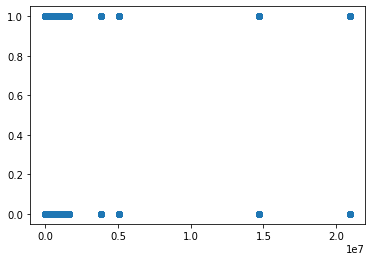

In [150]:
plt.scatter(df.GDP, df.v1_work_Very_Imp, cmap='rainbow')

In [151]:
%matplotlib inline

In [152]:
df4 = df[['v1_work_Very_Imp', 'country_code', 'GDP']]

In [153]:
print(df4)

       v1_work_Very_Imp country_code           GDP
0                     1           AD   3155.065488
1                     1           AD   3155.065488
2                     0           AD   3155.065488
3                     0           AD   3155.065488
4                     1           AD   3155.065488
...                 ...          ...           ...
71353                 1           ZW  16768.513443
71354                 1           ZW  16768.513443
71355                 0           ZW  16768.513443
71356                 1           ZW  16768.513443
71357                 1           ZW  16768.513443

[71358 rows x 3 columns]


In [154]:
df5=df4.groupby(['country_code']).mean()

In [155]:
print(df5)

              v1_work_Very_Imp           GDP
country_code                                
AD                    0.570776  3.155065e+03
AR                    0.620172  3.830670e+05
AU                    0.311721  1.330901e+06
BD                    0.797918  3.242392e+05
BO                    0.767228  3.668886e+04
BR                    0.609880  1.444733e+06
CA                    0.328496  1.643408e+06
CL                    0.528814  2.529400e+05
CN                    0.432534  1.472273e+07
CO                    0.724967  2.713469e+05
CY                    0.527650  2.380434e+04
DE                    0.427567  3.806060e+06
EC                    0.783434  9.880801e+04
EG                    0.741348  3.630692e+05
ET                    0.908787  1.076451e+05
GR                    0.701408  1.894101e+05
GT                    0.600354  7.760463e+04
HK                    0.306601  3.465859e+05
ID                    0.932020  1.058424e+06
IQ                    0.808090  1.672244e+05
IR        

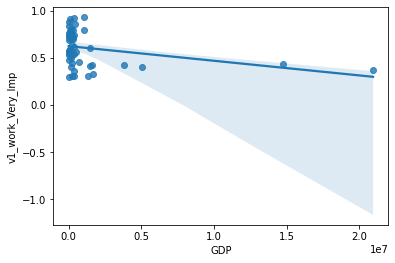

In [156]:
sns.regplot(x="GDP", y="v1_work_Very_Imp", data=df5);

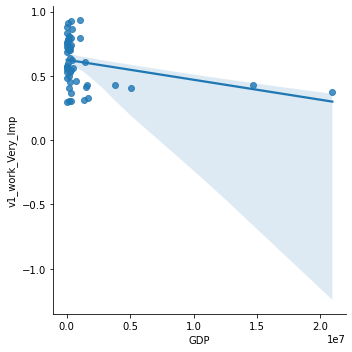

In [157]:
sns.lmplot(x="GDP", y="v1_work_Very_Imp", data=df5);


In [158]:
df[df.GDP < np.percentile(df.GDP,95)]

,country_code,v1_family,v1_friends,v1_leisure,v1_politics,v1_work,v1_religion,sex,marital_status,education,...,v1_religion_Not_at_all_Imp,relation1,relation2,relation3,male_indicator,female_indicator,relation4,relation5,relation6,relation7
0,AD,1,1,1,3,1,4,Female,Married,Middle,...,1,1,0,0,0,1,0,1,0,0
1,AD,1,1,1,4,1,4,Male,Living together as married,Upper,...,1,1,0,0,1,0,1,0,0,0
2,AD,1,2,2,2,3,3,Male,Separated,Upper,...,0,0,0,0,1,0,0,0,0,0
3,AD,1,1,1,4,2,4,Female,Living together as married,Lower,...,1,1,0,0,0,1,0,0,0,0
4,AD,1,1,1,3,1,3,Male,Living together as married,Lower,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71353,ZW,1,3,1,1,1,2,Female,Married,Lower,...,0,0,0,0,0,1,0,1,0,0
71354,ZW,1,1,2,1,1,1,Male,Married,Upper,...,0,0,0,0,1,0,1,0,1,0
71355,ZW,1,3,2,2,2,2,Female,Married,Lower,...,0,0,0,0,0,1,0,0,0,0
71356,ZW,1,2,2,1,1,1,Female,Married,Lower,...,0,0,0,0,0,1,0,1,0,1


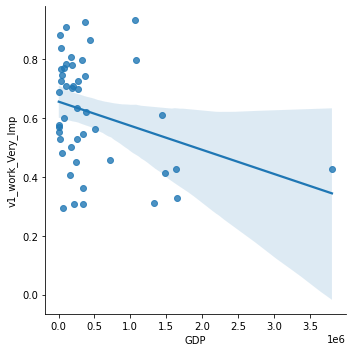

In [159]:
# 95th Percentile

sns.lmplot(x="GDP", y="v1_work_Very_Imp", data=df5[df5.GDP < np.percentile(df5.GDP,95)]);

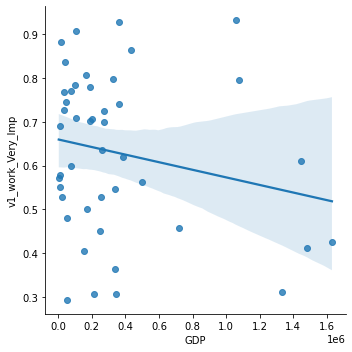

In [160]:
# 90th Percentile

sns.lmplot(x="GDP", y="v1_work_Very_Imp", data=df5[df5.GDP < np.percentile(df5.GDP,90)]);

In [161]:
# Result: There is negative relation. 
# We are using machine learing
# Regression models are used as the categorical variable - work_very_imp was converted into a continous variable
# So the variables used ie. work_very_imp and GDP are continuous
# This could be used to run the prediction